# Module 4: Exploratory Data Analysis (EDA)

## Objective
Explore the cleaned retail sales dataset to identify revenue patterns, product performance, and regional contributions.

## Dataset
This notebook uses the cleaned dataset generated in Module 3 to ensure insights are based on reliable data.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/retail_sales_cleaned.csv")

In [12]:
df.head()

,order_id,order_date,region,product,category,quantity,unit_price
0,1001,2023-01-05,North,Laptop,Electronics,2.0,750.0
1,1002,2023-01-07,South,Mobile,Electronics,8.0,300.0
2,1003,2023-01-10,East,Chair,Furniture,10.0,45.0
3,1004,2023-01-15,West,Table,Furniture,8.0,120.0
4,1005,2023-01-20,Unknown,Headphones,Electronics,8.0,60.0


In [13]:
df.tail()

,order_id,order_date,region,product,category,quantity,unit_price
1,1002,2023-01-07,South,Mobile,Electronics,8.0,300.0
2,1003,2023-01-10,East,Chair,Furniture,10.0,45.0
3,1004,2023-01-15,West,Table,Furniture,8.0,120.0
4,1005,2023-01-20,Unknown,Headphones,Electronics,8.0,60.0
5,1006,2023-01-22,South,Sofa,Furniture,1.0,90.0


In [14]:
df.shape

(6, 7)

In [15]:
df.describe()

,order_id,quantity,unit_price
count,6.000000,6.000000,6.000000
mean,1003.500000,6.166667,227.500000
std,1.870829,3.710346,272.061574
min,1001.000000,1.000000,45.000000
25%,1002.250000,3.500000,67.500000
50%,1003.500000,8.000000,105.000000
75%,1004.750000,8.000000,255.000000
max,1006.000000,10.000000,750.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    6 non-null      int64  
 1   order_date  6 non-null      object 
 2   region      6 non-null      object 
 3   product     6 non-null      object 
 4   category    6 non-null      object 
 5   quantity    6 non-null      float64
 6   unit_price  6 non-null      float64
dtypes: float64(2), int64(1), object(4)
memory usage: 468.0+ bytes


In [17]:
df.columns

Index(['order_id', 'order_date', 'region', 'product', 'category', 'quantity',
       'unit_price'],
      dtype='object')

In [3]:
df["revenue"] = df["quantity"]*df["unit_price"]

In [19]:
df

,order_id,order_date,region,product,category,quantity,unit_price,revenue
0,1001,2023-01-05,North,Laptop,Electronics,2.0,750.0,1500.0
1,1002,2023-01-07,South,Mobile,Electronics,8.0,300.0,2400.0
2,1003,2023-01-10,East,Chair,Furniture,10.0,45.0,450.0
3,1004,2023-01-15,West,Table,Furniture,8.0,120.0,960.0
4,1005,2023-01-20,Unknown,Headphones,Electronics,8.0,60.0,480.0
5,1006,2023-01-22,South,Sofa,Furniture,1.0,90.0,90.0


In [21]:
df["revenue"].describe()

count       6.000000
mean      980.000000
std       849.729369
min        90.000000
25%       457.500000
50%       720.000000
75%      1365.000000
max      2400.000000
Name: revenue, dtype: float64

In [22]:
total_revenue = df["revenue"].sum()

In [23]:
total_revenue

np.float64(5880.0)

In [24]:
category_revenue = ( df.groupby("category")["revenue"].sum().sort_values(ascending = False) )

In [25]:
category_revenue

category
Electronics    4380.0
Furniture      1500.0
Name: revenue, dtype: float64

In [26]:
product_revenue = ( df.groupby("product")["revenue"].sum().sort_values( ascending = False) )

In [27]:
product_revenue

product
Mobile        2400.0
Laptop        1500.0
Table          960.0
Headphones     480.0
Chair          450.0
Sofa            90.0
Name: revenue, dtype: float64

In [28]:
region_revenue = ( df.groupby("region")["revenue"].sum().sort_values( ascending = False) )

In [29]:
region_revenue

region
South      2490.0
North      1500.0
West        960.0
Unknown     480.0
East        450.0
Name: revenue, dtype: float64

In [30]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


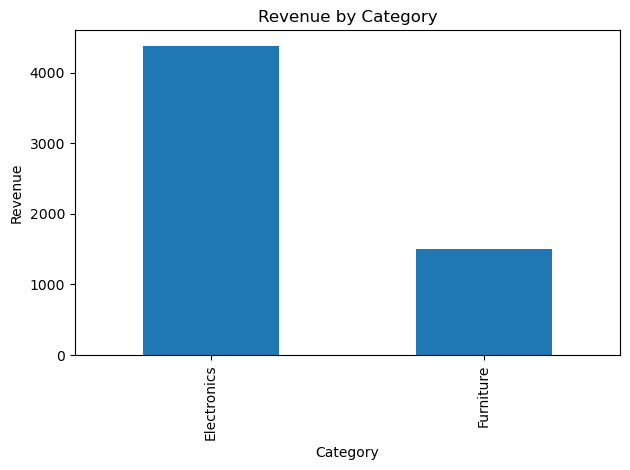

In [34]:
category_revenue.plot(kind = "bar")
plt.title("Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

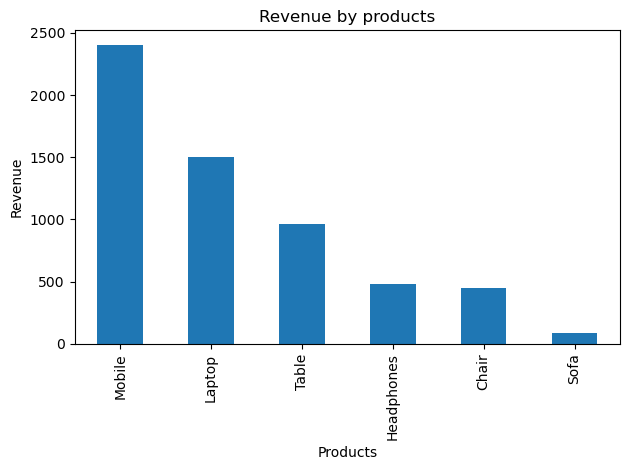

In [35]:
product_revenue.plot( kind = "bar")
plt.title("Revenue by products")
plt.xlabel("Products")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

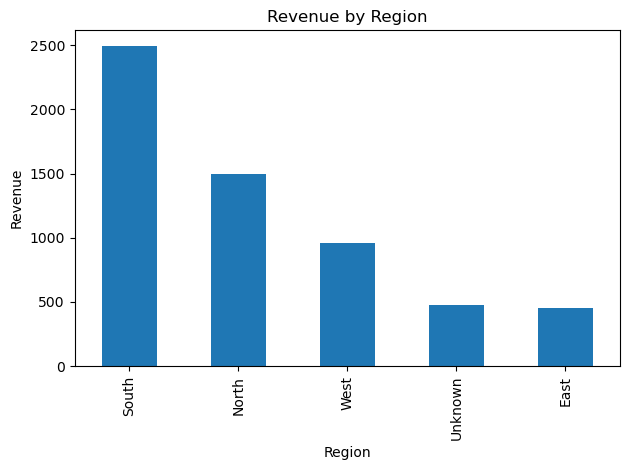

In [36]:
region_revenue.plot( kind = "bar")
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

## Key Insights

- Electronics contributes the highest share of total revenue compared to Furniture.
- A small number of products (e.g., Laptop, Mobile) generate a disproportionate amount of revenue.
- Revenue attributed to the "Unknown" region indicates missing geographic data and a need for improved data collection.
- Focusing on top-performing products and categories could yield higher returns with minimal effort.

## Analyst Reflections

1. If you could invest in only one product next quarter, which would it be and why?
2. What is one risk you see in making decisions from this dataset?
3. What additional column would most improve future analysis?